In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from src.p_mean import get_optimum_vector, generalized_p_mean
from src.portfolio import Policy, portfolio_with_line_search

plt.rcParams['figure.dpi'] = 300


# Load data

In [10]:
scores = pd.read_csv('../../data/sclm_real_world/portfolio_synth_realworld_1_0_reward_distr_array.csv')

for id in scores.index:
    if scores.loc[id]['Score for reward function 0'] == 0.0:
        scores.drop(id, inplace=True)

base_scores = list(scores['Score for reward function 0'])

keys = list(scores['Key'])
categories = list(scores['Category'])

education_key_ids = [i for i in range(len(keys)) if categories[i] == 'Education level']
education_keys = [keys[i] for i in education_key_ids]

age_key_ids = [i for i in range(len(keys)) if categories[i] == 'Age']
age_keys = [keys[i] for i in age_key_ids]

scores_array = [
    np.array((df['Score for reward function ' + str(i)])) for i in range(285)
]

# Compute portfolio of size 3

In [14]:
alpha = 0.60
N = 53

def get_optimum_policy(p):
    return get_optimum_vector(vectors=scores, p=p)

def get_performance(policy, p):
    return generalized_p_mean(x=policy.id, p=p)

def get_optimal_value(p):
    return get_performance(Policy(get_optimum_policy(p)), p)

portfolio = portfolio_with_line_search(
    vectors=scores_array, alpha=alpha
)

len(portfolio)

3

In [16]:
def get_dict_portfolio(policies, key_ids, keys, base_scores):
    dict_portfolio = {}
    for i in range(len(policies)):
        policy = dict()
        for j in range(len(key_ids)):
            key = keys[j]
            policy[key] = policies[i].id[key_ids[j]]/base_scores[key_ids[j]]
        dict_portfolio[i] = policy

    return dict_portfolio

education_portfolio = get_dict_portfolio(portfolio.policies, education_key_ids, education_keys, base_scores)
age_portfolio = get_dict_portfolio(portfolio.policies, age_key_ids, age_keys, base_scores)

# Plot

In [17]:
def create_bar_plot(portfolio, keys, title):
    fig, ax = plt.subplots()

    classes = list(portfolio[0].keys())
    x = np.arange(len(classes))

    width = 0.20

    for i in range(len(portfolio)):
        values = list(portfolio[i].values())
        # Change palette to get different colors
        ax.bar(x + i*width, values, width, label=f'Policy {i + 1}', color=plt.cm.Set1(i))

    ax.set_xticks(x + width/2)
    ax.set_xticklabels(classes)

    ax.set_ylabel('(Normalized) Score', fontsize=16)
    ax.set_title(title, fontsize=20)

    if 'age' in title.lower():
        min_y = min([min(list(portfolio[i].values())) for i in range(len(portfolio))])
        max_y = max([max(list(portfolio[i].values())) for i in range(len(portfolio))])
        ax.set_ylim([min_y - 0.05, max_y + 0.02])

    # Rotate the x labels
    plt.xticks(rotation=75, fontsize=12)

    ax.legend(fontsize=16)

    # Change figure size
    fig.set_size_inches(8, 6)

    return fig, ax
    

## By education level

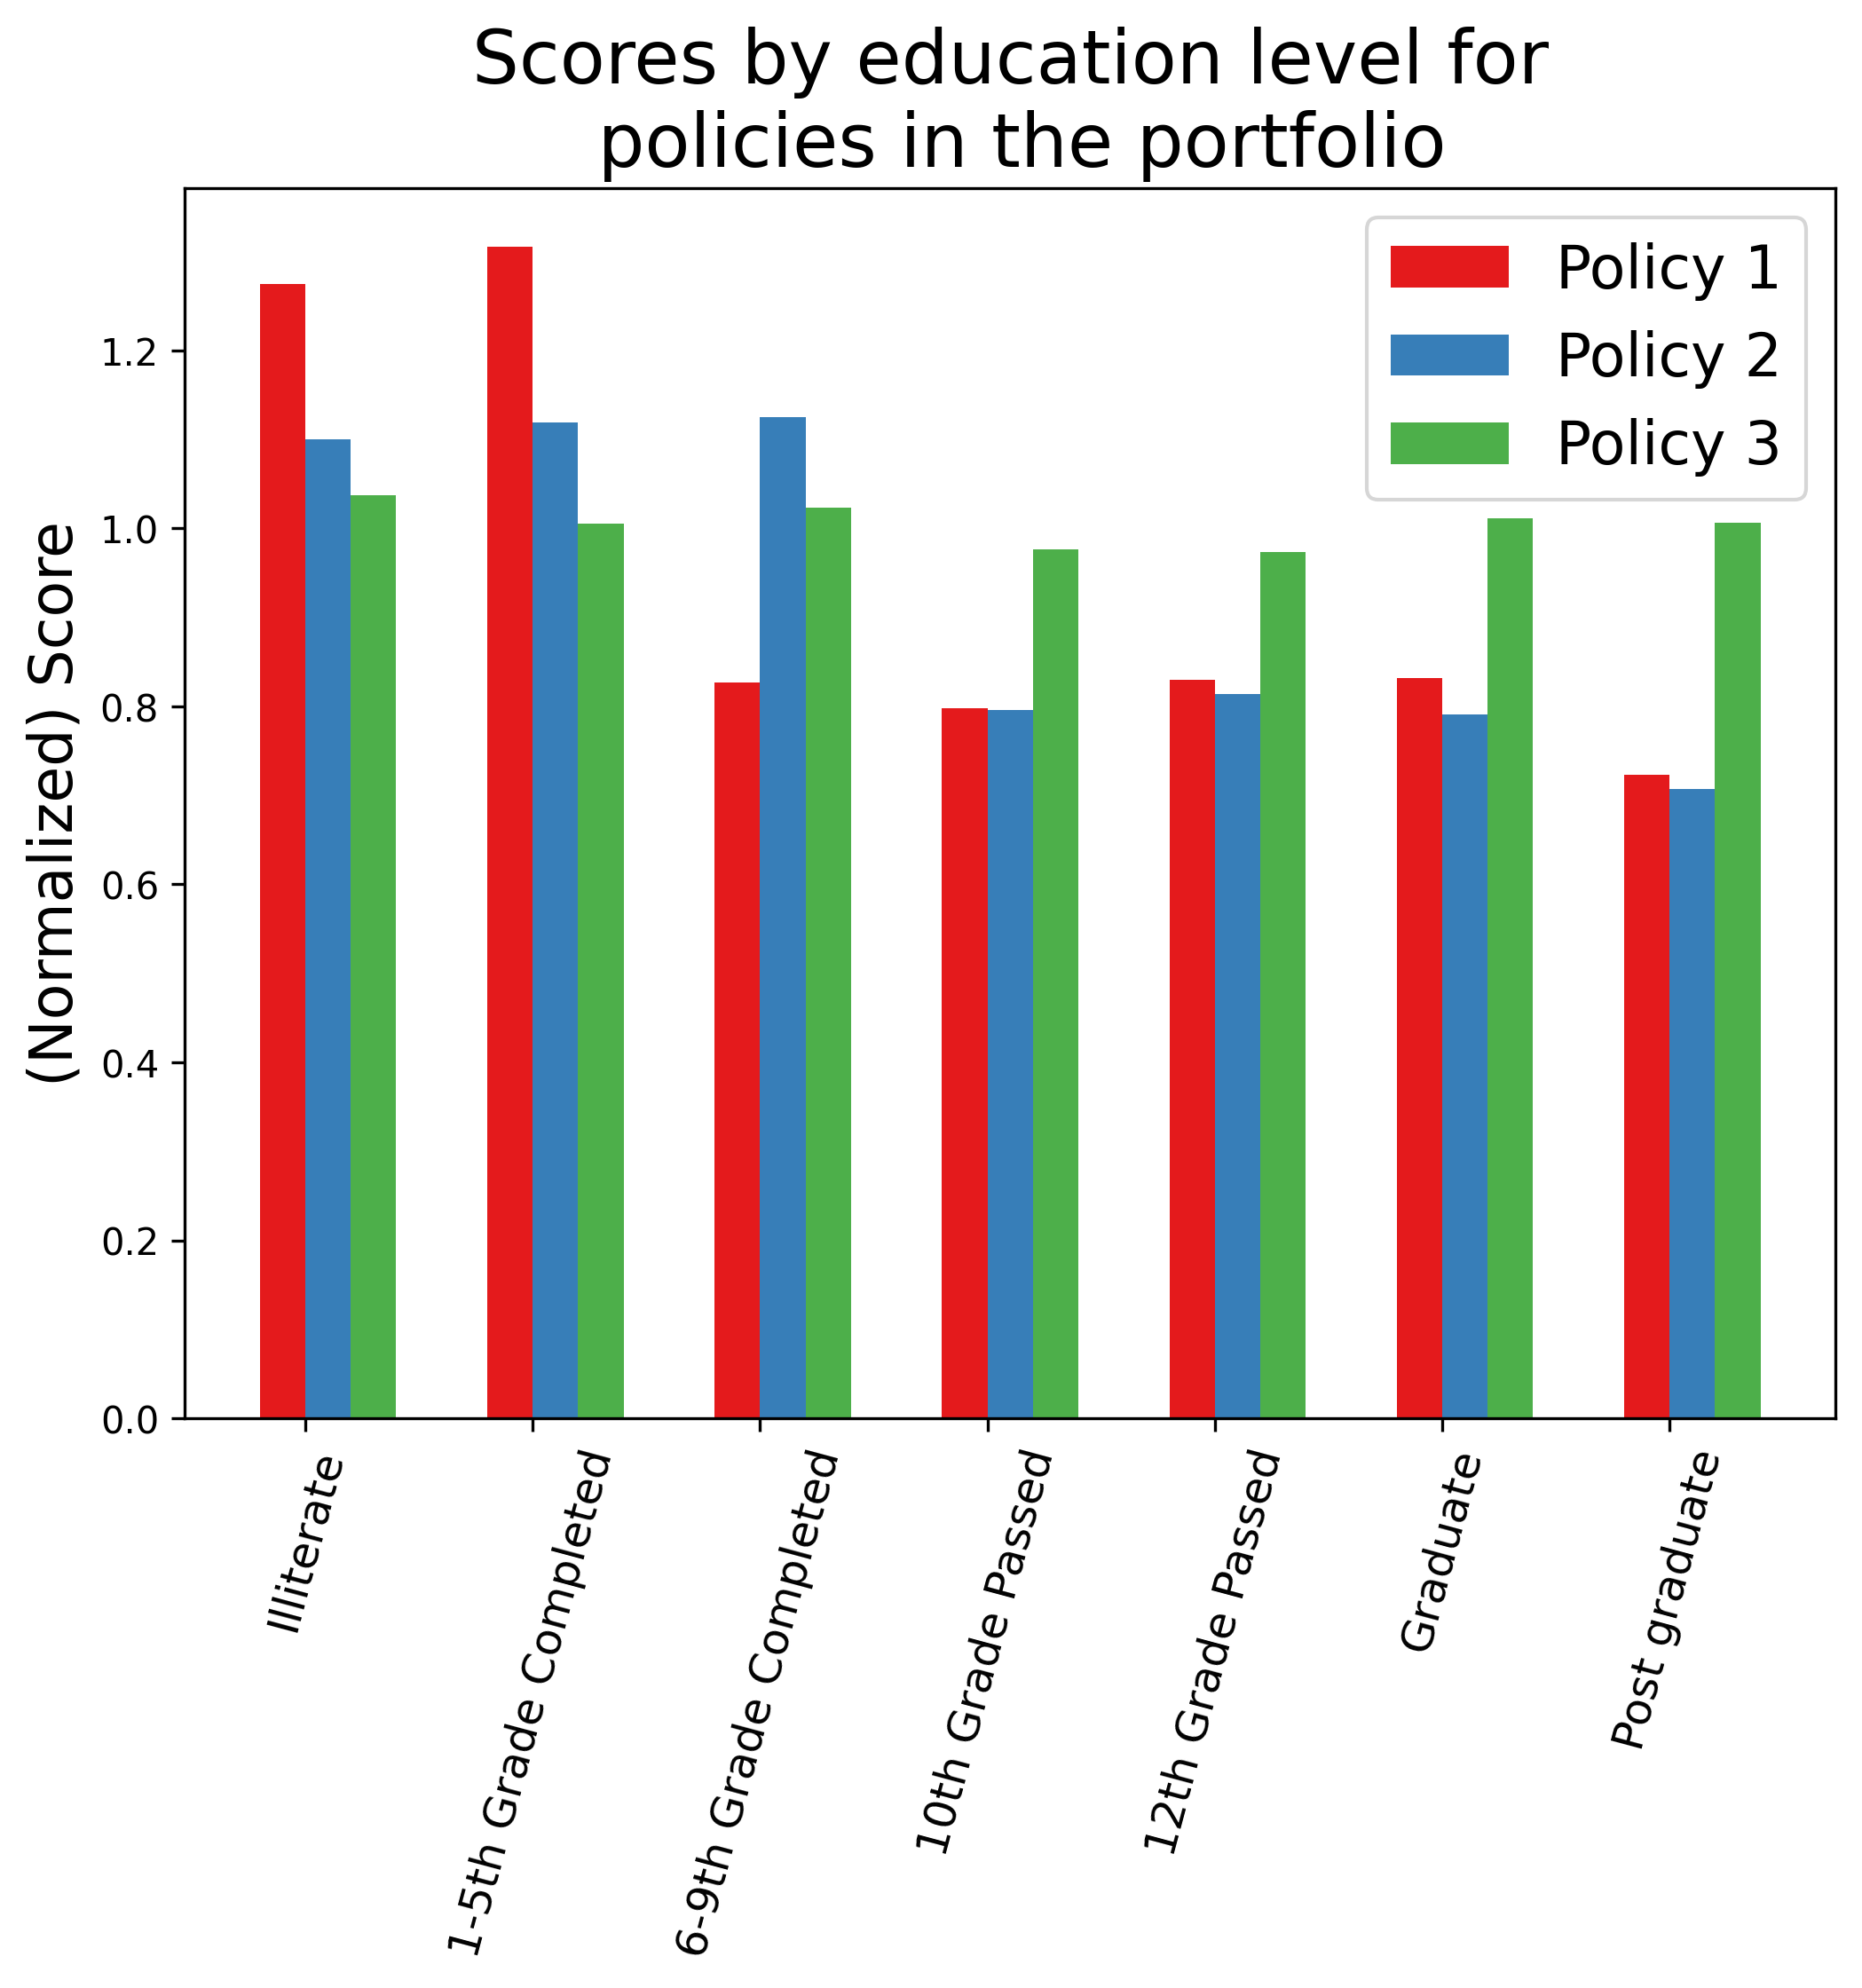

In [20]:
fig, ax = create_bar_plot(education_portfolio, education_keys, 'Scores by education level for\n policies in the portfolio')

# Save the figure
fig.savefig('../../plots/paper_figure_1_education_portfolio.png', bbox_inches='tight')


## By age

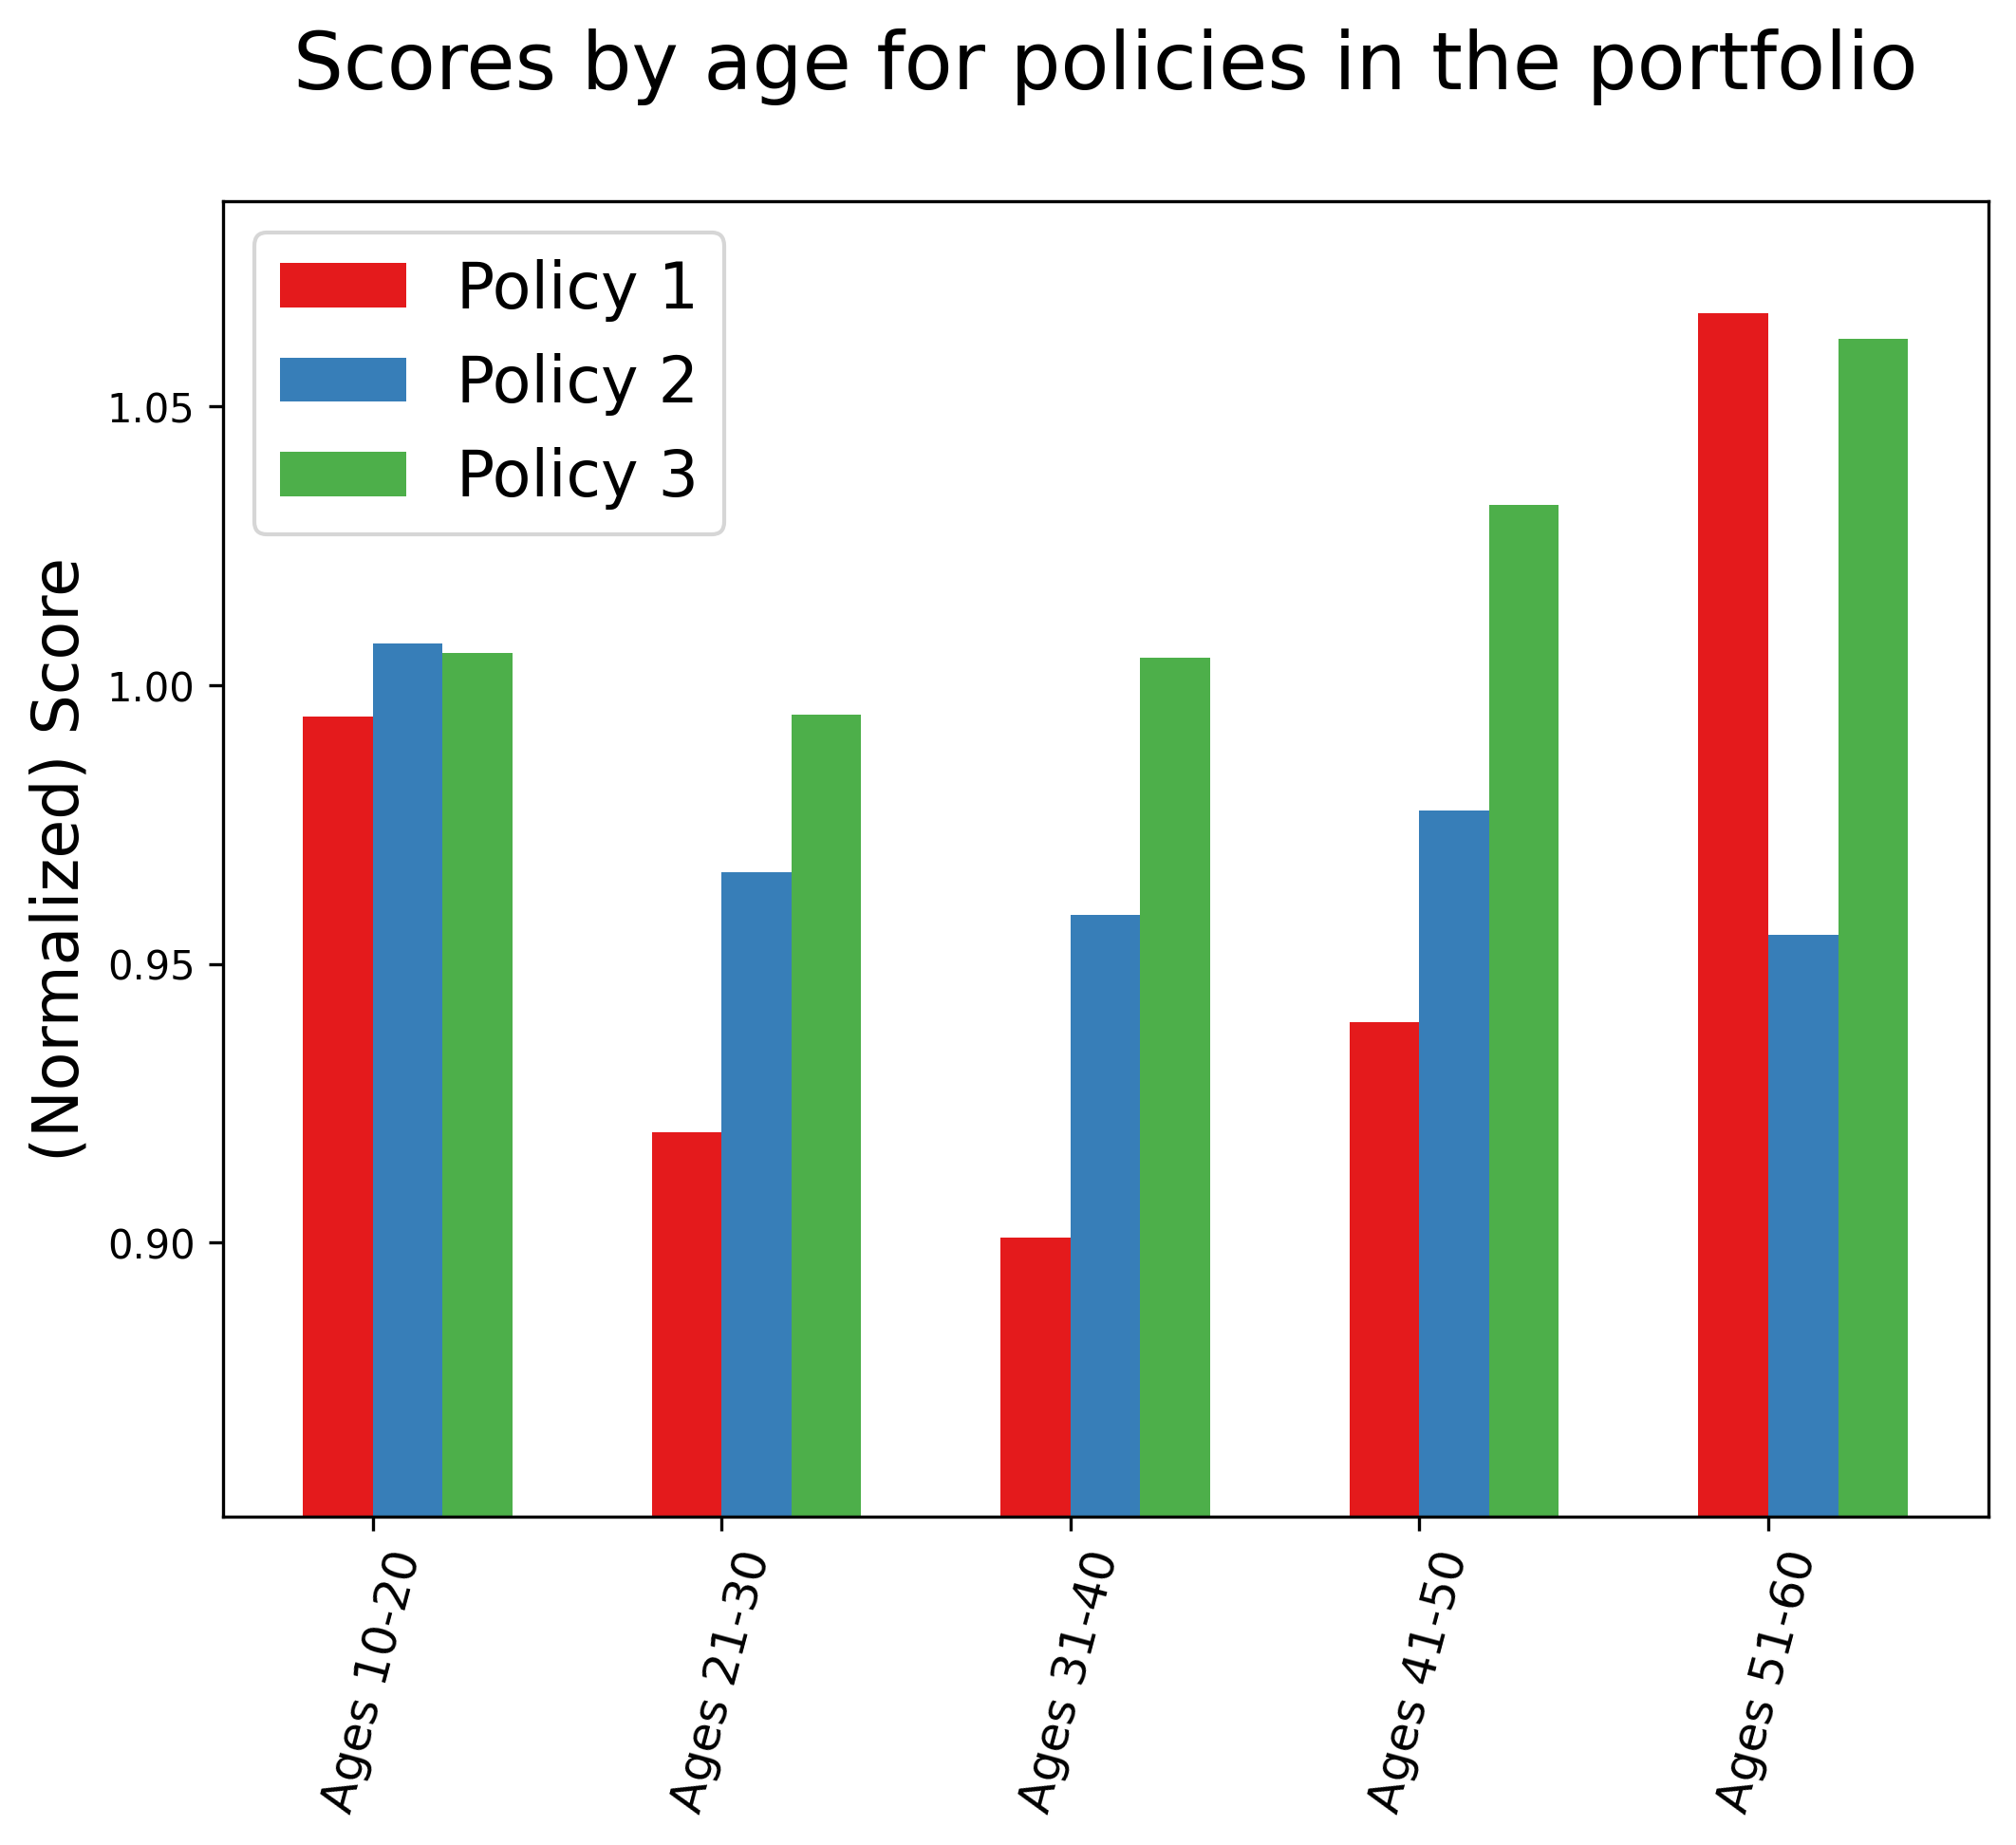

In [22]:
fig, ax = create_bar_plot(age_portfolio, age_keys, 'Scores by age for policies in the portfolio\n')

# Save the figure
fig.savefig('../../plots/paper_figure_1_age_portfolio.png', bbox_inches='tight')